In [1]:
#dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%pylab inline
from scipy import stats


Populating the interactive namespace from numpy and matplotlib


In [2]:
#data file

filepath="olympics_df.csv"

olympics_df=pd.read_csv(filepath)

olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City
0,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Pommelled Horse,1896,Summer,Athina
1,4493,Antelothanasis,M,NaN,NaN,NaN,GRE,Greece,NaN,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",1896,Summer,Athina
2,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,FRA,France,Silver,Athletics,Athletics Men's Triple Jump,1896,Summer,Athina
3,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,FRA,France,NaN,Athletics,Athletics Men's Long Jump,1896,Summer,Athina
4,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Horse Vault,1896,Summer,Athina


## Medal counts for Top 10 performance regions, by gender

In [3]:
#add 3 medal columns for Gold, Silver, and Bronze...

olympicsMedals=olympics_df
olympicsMedals["Gold"]=[1 if x=="Gold" else 0 for x in olympicsMedals.Medal]
olympicsMedals["Silver"]=[1 if x=="Silver" else 0 for x in olympicsMedals.Medal]
olympicsMedals["Bronze"]=[1 if x=="Bronze" else 0 for x in olympicsMedals.Medal]

#...and 1 extra medal column that can be counted later
olympicsMedals["MedalCount"]=[0 if pd.isnull(x) else 1 for x in olympics_df.Medal]

olympicsMedals = olympicsMedals.sort_values('MedalCount',ascending = False)
olympicsMedals.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City,Gold,Silver,Bronze,MedalCount
210363,54120,Fabrice Jeannet,M,23.0,193.0,85.0,FRA,France,Gold,Fencing,"Fencing Men's epee, Team",2004,Summer,Athina,1,0,0,1
98573,72693,Leonid Dmytrovych Lytvynenko,M,23.0,185.0,87.0,URS,Russia,Silver,Athletics,Athletics Men's Decathlon,1972,Summer,Munich,0,1,0,1
68480,135042,Kazimierz Franciszek Zimny,M,25.0,172.0,60.0,POL,Poland,Bronze,Athletics,"Athletics Men's 5,000 metres",1960,Summer,Roma,0,0,1,1
98577,2599,Ion Alexe,M,26.0,189.0,81.0,ROU,Romania,Silver,Boxing,Boxing Men's Heavyweight,1972,Summer,Munich,0,1,0,1
214769,134853,Zhu Qinan,M,19.0,183.0,75.0,CHN,China,Gold,Shooting,"Shooting Men's Air Rifle, 10 metres",2004,Summer,Athina,1,0,0,1


In [4]:
#clean data to get top 10 regions' total medal counts

cleaned_byregion = olympicsMedals[['Region','MedalCount']]
cleaned_byregion= cleaned_byregion.groupby('Region').sum().sort_values('MedalCount',ascending = False)
top_ten_medalcounts = cleaned_byregion.iloc[0:10,].reset_index()
top_ten_regions = pd.DataFrame(top_ten_medalcounts['Region'])
top_ten_regions

,Region
0,United States of America
1,Russia
2,Germany
3,United Kingdom
4,France
5,Italy
6,Sweden
7,Canada
8,Australia
9,Hungary


## Total medal counts, overtime for Top 10 Performance Countries


In [5]:
#clean data to get total medal counts over time
overtime_byregion = olympicsMedals[['Region','Year','MedalCount']].reset_index(drop=True).dropna()
overtime_pivot = pd.pivot_table(overtime_byregion, values='MedalCount', index=['Region'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
medals_overtime = pd.merge(overtime_pivot, top_ten_regions, how='right', on='Region').set_index('Region')
medals_overtime

,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Region,,,,,,,,,,,,,,,,,,,,,
Australia,3,6,4,3,19,10,7,11,4,5,...,1,183,2,157,2,149,3,114,3,82
Canada,0,2,48,2,52,8,16,29,45,59,...,49,31,74,17,69,35,90,55,86,69
France,11,235,2,64,40,26,141,120,52,42,...,15,66,15,53,15,77,14,82,18,96
Germany,32,45,16,30,21,53,0,0,82,57,...,44,118,61,149,54,99,54,94,36,159
Hungary,6,5,4,13,20,30,0,22,21,35,...,0,53,0,40,0,27,0,26,0,22
Italy,0,5,0,56,8,25,84,51,72,77,...,17,65,21,104,25,42,5,68,14,72
Russia,0,0,0,0,3,14,0,0,0,0,...,52,187,38,189,41,142,25,140,68,115
Sweden,0,4,0,21,84,190,154,81,53,35,...,7,32,26,12,64,7,18,22,51,28
United Kingdom,9,108,2,39,368,170,111,95,59,35,...,4,54,6,57,1,81,1,126,10,145


## By gender medal counts, overtime for each countries

In [8]:
#create dataframe for count of male/female athletes over time for top 10 countries
#USA medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
usacount = overtime_bygender.loc[overtime_bygender['Region']=='United States of America'].reset_index(drop=True).dropna()
usabygender = pd.pivot_table(usacount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
usabygender = usabygender.set_index('Sex')
usabygender


Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,5,10,0,0,0,14,24,23,30,...,27,124,31,146,29,162,38,160,39,149
M,20,58,384,24,65,107,180,170,79,193,...,7,118,53,117,23,155,59,88,25,115


In [7]:
#UK medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
ukcount = overtime_bygender.loc[overtime_bygender['Region']=='UK'].reset_index(drop=True).dropna()
ukbygender = pd.pivot_table(ukcount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
ukbygender = ukbygender.set_index('Sex')
ukbygender

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,2,0,0,13,10,14,15,21,10,...,0,15,6,22,1,29,1,50,6,63
M,9,106,2,39,355,160,97,80,38,25,...,4,39,0,35,0,52,0,76,4,82


In [8]:
#Sweden medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
swedencount = overtime_bygender.loc[overtime_bygender['Region']=='Sweden'].reset_index(drop=True).dropna()
swedenbygender = pd.pivot_table(swedencount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
swedenbygender = swedenbygender.set_index('Sex')
swedenbygender

Year,1896,1900,1906,1908,1912,1920,1924,1928,1932,1936,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,1,4,7,5,3,0,2,...,6,10,24,4,32,1,9,2,13,25
M,0,4,21,83,186,147,76,50,35,43,...,1,22,2,8,32,6,9,20,38,3


In [9]:
#Russia medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
russiacount = overtime_bygender.loc[overtime_bygender['Region']=='Russia'].reset_index(drop=True).dropna()
russiabygender = pd.pivot_table(russiacount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
russiabygender = russiabygender.set_index('Sex')
russiabygender

Year,1900,1908,1912,1924,1952,1956,1960,1964,1968,1972,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,37,35,51,67,57,55,...,20,89,11,91,23,82,9,72,23,82
M,0,3,14,0,80,171,160,154,172,204,...,32,98,27,98,18,60,16,68,45,33


In [10]:
#Italy medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
italycount = overtime_bygender.loc[overtime_bygender['Region']=='Italy'].reset_index(drop=True).dropna()
italybygender = pd.pivot_table(italycount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
italybygender = italybygender.set_index('Sex')
italybygender

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,0,0,0,0,12,0,...,7,13,9,26,10,14,1,16,9,23
M,0,5,0,56,8,25,84,51,60,77,...,10,52,12,78,15,28,4,52,5,49


In [11]:
#Hungary medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
hungarycount = overtime_bygender.loc[overtime_bygender['Region']=='Hungary'].reset_index(drop=True).dropna()
hungarybygender = pd.pivot_table(hungarycount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
hungarybygender = hungarybygender.set_index('Sex')
hungarybygender

Year,1896,1900,1904,1906,1908,1912,1924,1928,1932,1936,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,0,0,0,0,2,11,...,0,25,0,11,0,7,0,10,0,14
M,6,5,4,13,20,30,22,21,33,32,...,0,28,0,29,0,20,0,16,0,8


In [12]:
#Germany medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
germanycount = overtime_bygender.loc[overtime_bygender['Region']=='Germany'].reset_index(drop=True).dropna()
germanybygender = pd.pivot_table(germanycount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
germanybygender = germanybygender.set_index('Sex')
germanybygender

Year,1896,1900,1904,1906,1908,1912,1928,1932,1936,1952,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,2,6,10,2,27,12,...,25,58,29,74,27,44,29,27,14,68
M,32,45,16,30,19,47,72,55,204,40,...,19,60,32,75,27,55,25,67,22,91


In [13]:
#France medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
francecount = overtime_bygender.loc[overtime_bygender['Region']=='France'].reset_index(drop=True).dropna()
francebygender = pd.pivot_table(francecount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
francebygender = francebygender.set_index('Sex')
francebygender

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,2,0,1,0,2,5,2,2,1,...,3,13,6,22,6,10,8,31,3,28
M,11,233,2,63,40,24,136,118,50,41,...,12,53,9,31,9,67,6,51,15,68


In [14]:
#Canada medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
canadacount = overtime_bygender.loc[overtime_bygender['Region']=='Canada'].reset_index(drop=True).dropna()
canadabygender = pd.pivot_table(canadacount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
canadabygender = canadabygender.set_index('Sex')
canadabygender

Year,1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,0,0,0,7,6,5,...,33,23,37,7,48,9,44,38,42,59
M,2,48,2,52,8,16,29,38,53,30,...,16,8,37,10,21,26,46,17,44,10


In [15]:
#Australia medal counts by gender, overtime
overtime_bygender = olympicsMedals[['Region','Sex','Year','MedalCount']].reset_index(drop=True).dropna()
australiacount = overtime_bygender.loc[overtime_bygender['Region']=='Australia'].reset_index(drop=True).dropna()
australiabygender = pd.pivot_table(australiacount, values='MedalCount', index=['Sex'],
                     columns=['Year'], aggfunc=np.sum,fill_value=0).reset_index()
australiabygender = australiabygender.set_index('Sex')
australiabygender


Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,0,2,0,0,0,2,...,1,89,1,62,1,85,2,65,2,39
M,3,6,4,3,19,8,7,11,4,3,...,0,94,1,95,1,64,1,49,1,43


## Plot bar charts and lines for medalists by gender overtime


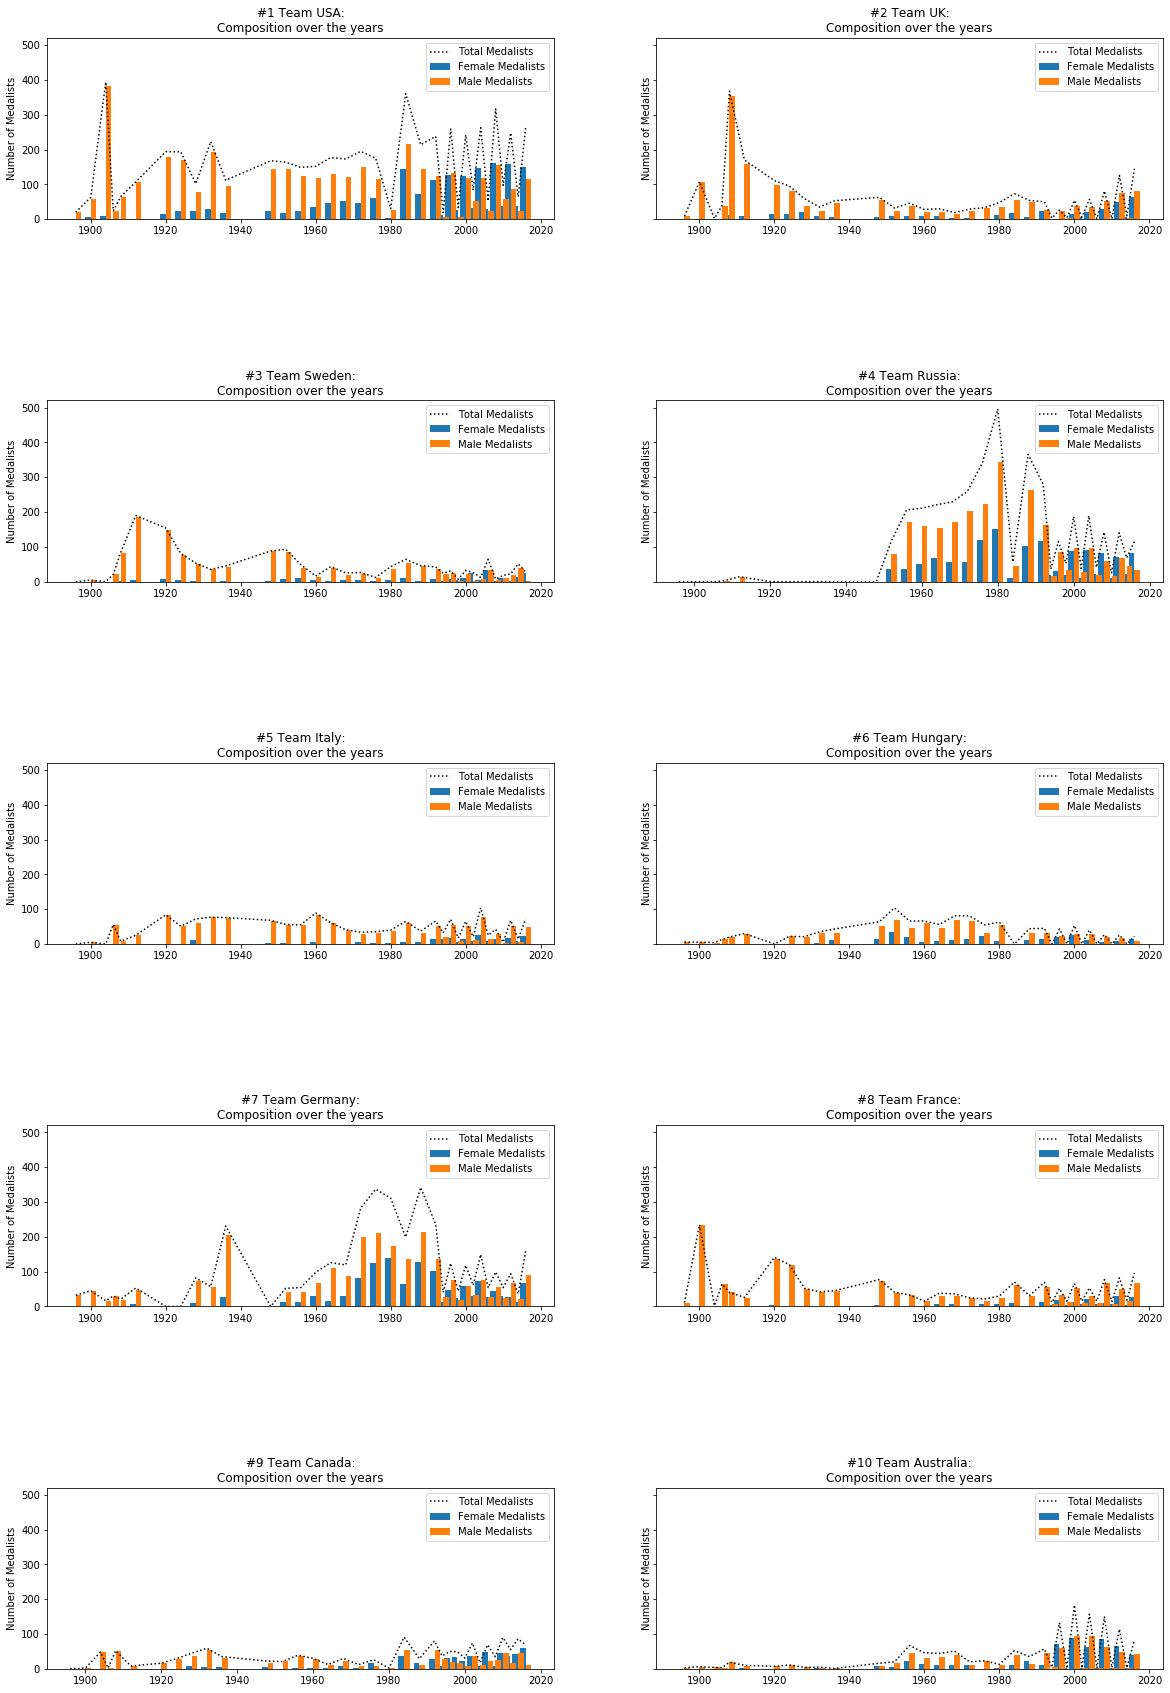

In [110]:
# Plot the values of male, female and total athletes using bar charts and the line charts.
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6) , (ax7,ax8), (ax9, ax10)) = subplots(nrows = 5, ncols = 2, figsize = (20, 30), sharey = True)
fig.subplots_adjust(hspace = 1)

# Plot team #1 USA's performance by gender
ax1.bar(usabygender.columns, usabygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax1.bar(usabygender.columns, usabygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax1.plot(medals_overtime.columns, medals_overtime.iloc[9], linestyle = ':', color = 'black', label = 'Total Medalists')
ax1.set_title('#1 Team USA:\nComposition over the years')
ax1.set_ylabel('Number of Medalists')
ax1.legend(loc = 'best')

# Plot team #2 UK's performance by gender
ax2.bar(ukbygender.columns, ukbygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax2.bar(ukbygender.columns, ukbygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax2.plot(medals_overtime.columns, medals_overtime.iloc[8], linestyle = ':', color = 'black', label = 'Total Medalists')
ax2.set_title('#2 Team UK:\nComposition over the years')
ax2.set_ylabel('Number of Medalists')
ax2.legend(loc = 'best')

# Plot team #3 Sweden's performance by gender
ax3.bar(swedenbygender.columns, swedenbygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax3.bar(swedenbygender.columns, swedenbygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax3.plot(medals_overtime.columns, medals_overtime.iloc[7], linestyle = ':', color = 'black', label = 'Total Medalists')
ax3.set_title('#3 Team Sweden:\nComposition over the years')
ax3.set_ylabel('Number of Medalists')
ax3.legend(loc = 'best')

# Plot team #4 Russia's performance by gender
ax4.bar(russiabygender.columns, russiabygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax4.bar(russiabygender.columns, russiabygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax4.plot(medals_overtime.columns, medals_overtime.iloc[6], linestyle = ':', color = 'black', label = 'Total Medalists')
ax4.set_title('#4 Team Russia:\nComposition over the years')
ax4.set_ylabel('Number of Medalists')
ax4.legend(loc = 'best')

# Plot team #5 Italy's performance by gender
ax5.bar(italybygender.columns, italybygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax5.bar(italybygender.columns, italybygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax5.plot(medals_overtime.columns, medals_overtime.iloc[5], linestyle = ':', color = 'black', label = 'Total Medalists')
ax5.set_title('#5 Team Italy:\nComposition over the years')
ax5.set_ylabel('Number of Medalists')
ax5.legend(loc = 'best')

# Plot team #6 Hungary's performance by gender
ax6.bar(hungarybygender.columns, hungarybygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax6.bar(hungarybygender.columns, hungarybygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax6.plot(medals_overtime.columns, medals_overtime.iloc[4], linestyle = ':', color = 'black', label = 'Total Medalists')
ax6.set_title('#6 Team Hungary:\nComposition over the years')
ax6.set_ylabel('Number of Medalists')
ax6.legend(loc = 'best')

# Plot team #7 Germany's performance by gender
ax7.bar(germanybygender.columns, germanybygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax7.bar(germanybygender.columns, germanybygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax7.plot(medals_overtime.columns, medals_overtime.iloc[3], linestyle = ':', color = 'black', label = 'Total Medalists')
ax7.set_title('#7 Team Germany:\nComposition over the years')
ax7.set_ylabel('Number of Medalists')
ax7.legend(loc = 'best')

# Plot team #8 France's performance by gender
ax8.bar(francebygender.columns, francebygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax8.bar(francebygender.columns, francebygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax8.plot(medals_overtime.columns, medals_overtime.iloc[2], linestyle = ':', color = 'black', label = 'Total Medalists')
ax8.set_title('#8 Team France:\nComposition over the years')
ax8.set_ylabel('Number of Medalists')
ax8.legend(loc = 'best')

# Plot team #9 Canada's performance by gender
ax9.bar(canadabygender.columns, canadabygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax9.bar(canadabygender.columns, canadabygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax9.plot(medals_overtime.columns, medals_overtime.iloc[1], linestyle = ':', color = 'black', label = 'Total Medalists')
ax9.set_title('#9 Team Canada:\nComposition over the years')
ax9.set_ylabel('Number of Medalists')
ax9.legend(loc = 'best')

# Plot team #10 Australia's performance by gender
ax10.bar(australiabygender.columns, australiabygender.iloc[0], width = -1.5, align = 'edge', label = 'Female Medalists')
ax10.bar(australiabygender.columns, australiabygender.iloc[1], width = 1.5, align = 'edge', label = 'Male Medalists')
ax10.plot(medals_overtime.columns, medals_overtime.iloc[0], linestyle = ':', color = 'black', label = 'Total Medalists')
ax10.set_title('#10 Team Australia:\nComposition over the years')
ax10.set_ylabel('Number of Medalists')
ax10.legend(loc = 'best')

In [139]:
years = []
for i in range(len(medals_overtime.columns)):
    if medals_overtime.columns[i]%4==0:
        years.append(medals_overtime.columns[i])
years

[1896,
 1900,
 1904,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

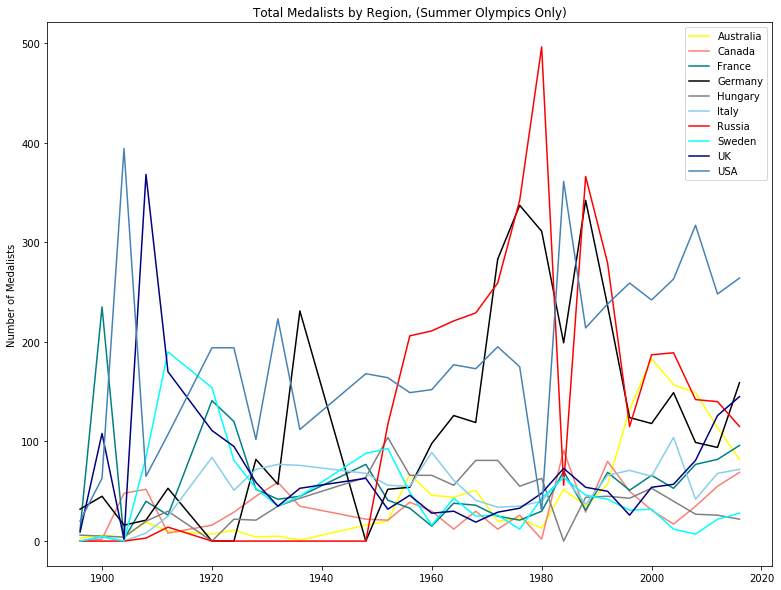

In [141]:
colors = ['yellow','salmon','teal','black','grey','skyblue','red','aqua','navy','steelblue']
plt.figure(0,(13,10))

medals_overtime_summer = medals_overtime.loc[:,years]
for i in range(len(medals_overtime_summer)):
    plt.plot(medals_overtime_summer.columns, medals_overtime_summer.iloc[i], linestyle = '-', color = colors[i], label = medals_overtime_summer.index[i])
plt.title('Total Medalists by Region, (Summer Olympics Only)')
plt.ylabel('Number of Medalists')
plt.legend(loc = 'best')
    

## World Happiness Index vs. Share of medals by region


In [19]:
#Happiness Index vs. %Share of medals 

In [20]:
#data file

filepath="Happiness_Index (2015 -2019).csv"

happiness_df=pd.read_csv(filepath)

happiness_df.head()

,Year,Overall rank,Country or region,Happiness Score,GDP per capita
0,2019,1,Finland,7.769,1.340
1,2019,2,Denmark,7.600,1.383
2,2019,3,Norway,7.554,1.488
3,2019,4,Iceland,7.494,1.380
4,2019,5,Netherlands,7.488,1.396


##  Happiness Score 2016 vs. Share of medals in 2016 olympics, by country

In [21]:
happiness2016 = happiness_df.loc[happiness_df['Year']==2016].reset_index(drop = True)
del happiness2016['Year']
happiness2016 =happiness2016.rename(columns={"Country or region": "Region"})

In [22]:
medals2016 = pd.DataFrame(overtime_pivot[overtime_pivot.columns[[0,35]]])
medals2016['2016 % Share of Medals'] = medals2016[2016]/medals2016[2016].sum()
medals2016['2016 % Share of Medals'] = medals2016['2016 % Share of Medals'].mul(100).astype(float).astype(str)
medals2016=medals2016.sort_values('2016 % Share of Medals', ascending = False)
medals2016 =medals2016.rename(columns={"2016": "2016 Medals"})
medals2016

Year,Region,2016,2016 % Share of Medals
67,Germany,159,7.863501483679524
190,UK,145,7.1711177052423345
151,Russia,115,5.687438180019782
39,China,113,5.588526211671612
63,France,96,4.747774480712167
...,...,...,...
98,Laos,0,0.0
99,Latvia,0,0.0
100,Lebanon,0,0.0
101,Lesotho,0,0.0


In [23]:
#Exclude countries that have below 1% share of medals

happiness_merged_df = pd.merge(happiness2016, medals2016, how='outer', on='Region').reset_index(drop=True).dropna()
happiness_no_zeros_df = happiness_merged_df.loc[happiness_merged_df["2016 % Share of Medals"] > '0.0']
happiness_no_zeros_df.round(1)

,Overall rank,Region,Happiness Score,GDP per capita,2016,2016 % Share of Medals
0,1.0,Denmark,7.5,1.4,41.0,2.0276953511374876
1,2.0,Switzerland,7.5,1.5,11.0,0.5440158259149357
3,4.0,Norway,7.5,1.6,19.0,0.9396636993076163
4,5.0,Finland,7.4,1.4,1.0,0.04945598417408506
5,6.0,Canada,7.4,1.4,69.0,3.4124629080118694
...,...,...,...,...,...,...
125,126.0,Georgia,4.3,0.8,7.0,0.34619188921859545
128,129.0,Bulgaria,4.2,1.1,7.0,0.34619188921859545
138,139.0,Ivory Coast,3.9,0.6,2.0,0.09891196834817012
141,142.0,Niger,3.9,0.1,1.0,0.04945598417408506


The r-squared is: 0.28586866537238365


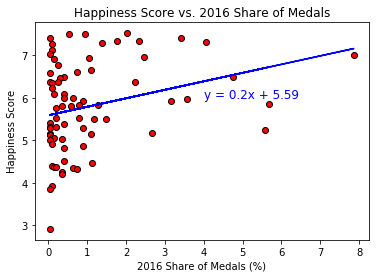

In [24]:
cleaned_happiness_merged = happiness_no_zeros_df[['Region','Happiness Score','GDP per capita','2016 % Share of Medals']].reset_index(drop=True)
#plt.scatter(cleaned_happiness_merged['2016 % Share of Medals'],cleaned_happiness_merged['Happiness Score'])

x_values = pd.to_numeric(cleaned_happiness_merged['2016 % Share of Medals']).astype(float)
y_values = pd.to_numeric(cleaned_happiness_merged['Happiness Score']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(4,6),fontsize=12,color="blue")
plt.xlabel('2016 Share of Medals (%)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. 2016 Share of Medals')
print(f"The r-squared is: {rvalue}")
plt.savefig("Happiness Score vs. 2016 Share of Medals.png")
plt.show()



## World obesity rate vs. medals overtime by gender

In [40]:
#data file

filepath="World Obesity Rate.csv"

WOR_df=pd.read_csv(filepath, engine='python')

# regionlist = WOR_df['regions'].to_list()
# regionlist = list(dict.fromkeys(regionlist))
# regionlist = pd.DataFrame(regionlist)
# regionlist

# yearlist = list(WOR_df.columns.values)
# del yearlist[0:2]
# yearlist = pd.DataFrame(yearlist)
# yearlist

WOR_df

,regions,gender,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,F,3.22,3.39,3.58,3.78,3.99,4.20,4.43,4.66,4.91,5.16,5.43,5.71,6.00,6.31,6.62,6.95,7.29,7.65
1,Afghanistan,M,1.10,1.17,1.25,1.34,1.43,1.52,1.62,1.73,1.84,1.96,2.09,2.22,2.36,2.52,2.68,2.85,3.03,3.22
2,Angola,F,5.34,5.63,5.94,6.25,6.58,6.93,7.29,7.66,8.04,8.44,8.85,9.27,9.70,10.15,10.61,11.09,11.57,12.07
3,Angola,M,1.32,1.41,1.51,1.62,1.73,1.85,1.98,2.12,2.26,2.42,2.58,2.76,2.94,3.14,3.34,3.56,3.80,4.05
4,Albania,F,14.34,14.67,15.02,15.40,15.79,16.20,16.62,17.06,17.51,17.98,18.45,18.92,19.40,19.88,20.36,20.84,21.33,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,South Africa,M,7.23,7.58,7.96,8.34,8.74,9.16,9.60,10.04,10.51,10.99,11.48,11.99,12.51,13.04,13.59,14.16,14.75,15.35
374,Zambia,F,6.54,6.72,6.93,7.17,7.43,7.71,8.01,8.34,8.68,9.05,9.42,9.82,10.22,10.64,11.06,11.51,11.96,12.43
375,Zambia,M,1.58,1.63,1.69,1.75,1.83,1.91,2.00,2.10,2.21,2.33,2.45,2.59,2.73,2.88,3.03,3.20,3.38,3.56
376,Zimbabwe,F,17.51,18.02,18.51,18.99,19.47,19.94,20.40,20.85,21.30,21.74,22.17,22.60,23.03,23.47,23.91,24.35,24.80,25.26


In [92]:
col = WOR_df.loc[: , "2012":"2016"]
WOR_df['Recent Avg. Obesity Rate'] = col.mean(axis=1)
recent_WOR_df = WOR_df[['regions','gender','Recent Avg. Obesity Rate']]
recent_WOR_df =recent_WOR_df.rename(columns={"regions": "Region", "gender":'Sex'})
recent_WOR_df

,Region,Sex,Recent Avg. Obesity Rate
0,Afghanistan,F,6.964
1,Afghanistan,M,2.860
2,Angola,F,11.098
3,Angola,M,3.578
4,Albania,F,20.842
...,...,...,...
373,South Africa,M,14.178
374,Zambia,F,11.520
375,Zambia,M,3.210
376,Zimbabwe,F,24.358


In [79]:
#limit data to show only 2012 + 2016 values
cleaned_olympicsMedals = olympicsMedals[['Region','Year','Sex','MedalCount']].reset_index(drop=True)
cleaned_olympicsMedals = cleaned_olympicsMedals.loc[cleaned_olympicsMedals["Year"] > 2011]
cleaned_olympicsMedals.head(30)
grouped_olympicMedals = cleaned_olympicsMedals.groupby(['Region','Sex']).sum().reset_index()
del grouped_olympicMedals['Year']
grouped_olympicMedals= grouped_olympicMedals.sort_values('MedalCount')
grouped_olympicMedals

,Region,Sex,MedalCount
0,Afghanistan,F,0
247,Myanmar,F,0
246,Mozambique,M,0
245,Mozambique,F,0
243,Morocco,F,0
...,...,...,...
377,UK,M,162
298,Russia,F,177
132,Germany,M,180
379,USA,M,228


In [97]:
WOR_merged = pd.merge(recent_WOR_df, grouped_olympicMedals, how='outer', on=['Region','Sex']).reset_index(drop=True).dropna()
WOR_merged.head(30)
WOR_F = WOR_merged[WOR_merged['Sex'] == "F"]
WOR_M = WOR_merged[WOR_merged['Sex'] == "M"]


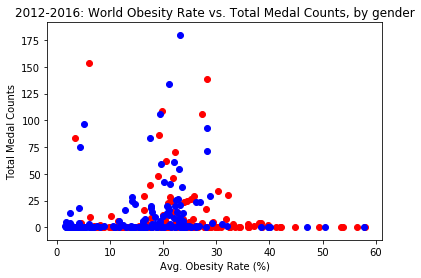

In [101]:
plt.scatter(WOR_F['Recent Avg. Obesity Rate'],WOR_F['MedalCount'], facecolors = red)

x_values = pd.to_numeric(WOR_M['Recent Avg. Obesity Rate']).astype(float)
y_values = pd.to_numeric(WOR_M['MedalCount']).astype(float)

plt.scatter(x_values,y_values,facecolors="blue")
plt.xlabel('Avg. Obesity Rate (%)')
plt.ylabel('Total Medal Counts')
plt.title('2012-2016: World Obesity Rate vs. Total Medal Counts, by gender')
plt.savefig("2012-2016: World Obesity Rate vs. Total Medal Counts, by gender.png")
plt.show()

In [103]:
import scipy.stats as sts
coefficient_female=sts.pearsonr(WOR_F['Recent Avg. Obesity Rate'],WOR_F['MedalCount'])[0]
pvalue_female=sts.pearsonr(WOR_F['Recent Avg. Obesity Rate'],WOR_F['MedalCount'])[1]
print(f"The correlation for female is {round(coefficient_female,4)} and the p-value is {round(pvalue_female,4)}")

The correlation for female is -0.0601 and the p-value is 0.4487


In [105]:
coefficient_male=sts.pearsonr(WOR_M['Recent Avg. Obesity Rate'],WOR_M['MedalCount'])[0]
pvalue_male=sts.pearsonr(WOR_M['Recent Avg. Obesity Rate'],WOR_M['MedalCount'])[1]
print(f"The correlation for male is {round(coefficient_male,4)} and the p-value is {round(pvalue_male,4)}")

The correlation for male is 0.1685 and the p-value is 0.0327
